[参考笔记](https://github.com/shazhongcheng/machine_learing_study/blob/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E6%88%98%E4%B8%80/%E7%AC%AC%E4%B8%80%E9%83%A8%E5%88%86-%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%9F%BA%E7%A1%80%20%E7%AC%AC%E4%BA%94%E7%AB%A0-%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA.ipynb)

支持向量机（SVM），它是一个非常强大的模型，能够进行线性/非线性的分类、回归、甚至异常值检测。SVM特别适用于中小型复杂数据集的分类。



In [8]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #更改一个有中文的字体
plt.rcParams['axes.unicode_minus']=False  #解决符号不显示问题

# 线性SVM分类

In [1]:
from sklearn.svm import SVC  #SVM（支持向量机） SVC（用于分类的支持向量机）SVR（用于回归的支持向量机）
from sklearn import datasets

iris = datasets.load_iris()   #还是鸢尾花
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [2]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # 获取决策边界的w和b
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    # 画中间的粗线
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    # 计算间隔
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    # 获取支持向量
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

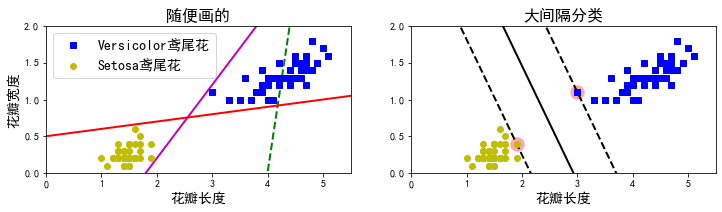

In [10]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
# 随便画的
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.title("随便画的", fontsize=16)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Versicolor鸢尾花")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Setosa鸢尾花")
plt.xlabel("花瓣长度", fontsize=14)
plt.ylabel("花瓣宽度", fontsize=14)

plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.title("大间隔分类", fontsize=16)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("花瓣长度", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

我们选择两个特征来做平面的分割<br>
- 先观察左图，绿色虚线的表现非常糟糕，其他两个虚线虽然完成了任务，但距离实例过近，显然是过拟合了
- 观察右图，这条线不仅分离了两个类别，并且尽可能远离了最近的训练实例。我们可以将SVM分类器视为在类别之间拟合可能的最宽的街道，平行的虚线所示。请注意，在街道之外，添加任意多的训练实例，都不会对决策边界产生影响，也就是说它完全由位于街道边缘的实例所决定(或者称为支持)。这是决定决策边界的实例称为支持向量。

(-2.0, 2.0, -2.0, 2.0)

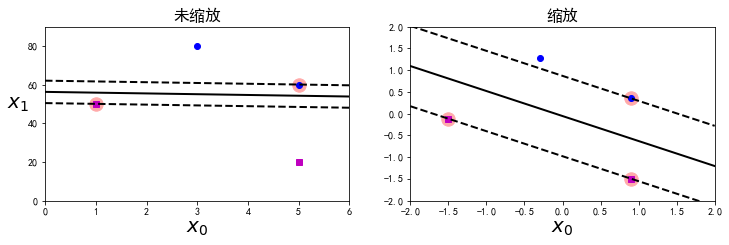

In [11]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("未缩放", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
# 对数据进行标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("缩放", fontsize=16)
plt.axis([-2, 2, -2, 2])

SVM对特征的缩放非常敏感

#软间隔分类
如果我们严格地让所有实例都不在街道上，这就是硬间隔分类，这会造成两个问题：

1. 首先，它只有数据线性可分的时候才有效。
1. 其次，对于异常值特别敏感。

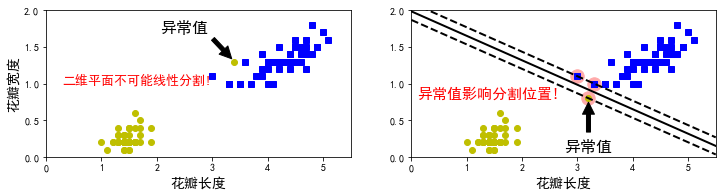

In [18]:

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "二维平面不可能线性分割!", fontsize=13, color="red")
plt.xlabel("花瓣长度", fontsize=14)
plt.ylabel("花瓣宽度", fontsize=14)
plt.annotate("异常值",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plt.text(0.1, 0.8, "异常值影响分割位置!", fontsize=15, color="red")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("花瓣长度", fontsize=14)
plt.annotate("异常值",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

为了避免这些问题，我们允许一部分实例在间隔内，这就是软间隔分类。<br>
在sklearn中，我们可以通过超参数C来控制这个平衡，C值越小，则间隔越宽，而间隔违例也会越多。反之，C越大，越少。

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 读取数据，并提取花瓣长度和宽度特征
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
# 二分类
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica
# 构建分类器通道，先标准化，然后过软间隔 C为1 loss为hinge的svc线性分类器
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [20]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [21]:
scaler = StandardScaler()
# 构建两个svc线性分类器，一个C为1 一个C为100
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [22]:
# Convert to unscaled parameters
# 将标准化的参数转化为未标准化的
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(4.0, 6.0, 0.8, 2.8)

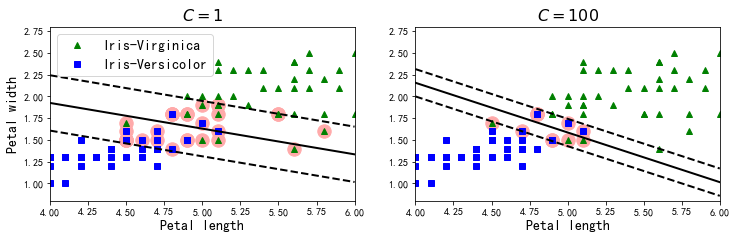

In [23]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
# 画数据点
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
# 画svc的决策边界
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

观察发现，当C=1时，街道比较宽，间隔比较多，当加大C值到100，街道变小，违例变少<br>
但仔细观察，好像两者泛化效果差不多

# 非线性SVM分类
虽然在许多情况下，线性SVM分类器是有效的，而且通常出人意料，但是数据集不一定是线性可分的。处理非线性数据集非方法之一是添加更多的特征，比如面对下面左图的数据，显然是线性不可分的。但是如果我们添加第二个特征$x_2=(x_1)^2$,生成的2D数据则完全线性可分离(这个维度线性不可分？可以试试上升一个维度)。

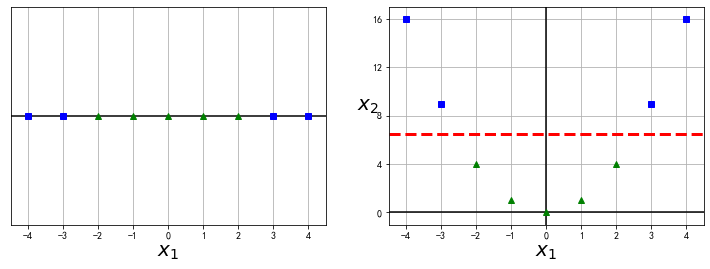

In [27]:
#这里只是画图演示
# y=0
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
# y=x^2
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
# 坐标轴
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
# 画红线
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

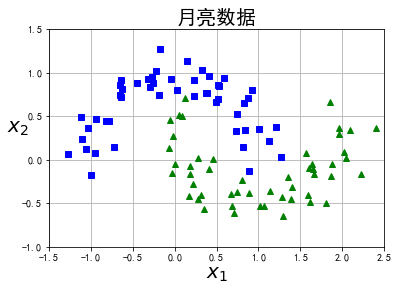

In [29]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.title("月亮数据",fontsize=20)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()   #明显，二维平面是线性不可分的，那只好去三维空间找一条直线了

In [30]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        # 将源数据 映射到 3阶多项式
        ("poly_features", PolynomialFeatures(degree=3)),
        # 标准化
        ("scaler", StandardScaler()),
        # SVC线性分类器
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

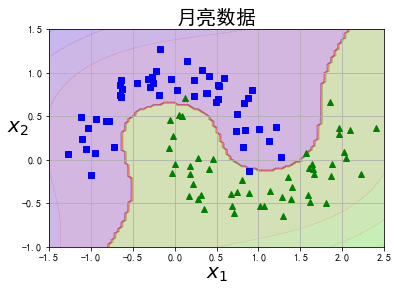

In [31]:
def plot_predictions(clf, axes):
    # 打表
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
#     print(y_pred)
#     print(y_decision)
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

# 多项式核
添加多项式特征实现起来非常简单，并且对所有机器学习算法(不只是SVM)都非常有效，但是问题是，如果多项式太低阶，处理不了非常复杂的数据集，而高阶会导致创造出大量特征，导致模型变得太慢。<br>
幸运的是,SVM有一个魔术般的数学技巧，那就是核技巧(稍后解释)。它产生结果和上面添加的多项式映射一样，但是并不是真的添加。由于并没有实际的添加，所以也就不存在数量爆炸的组合特征了。

In [32]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [33]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

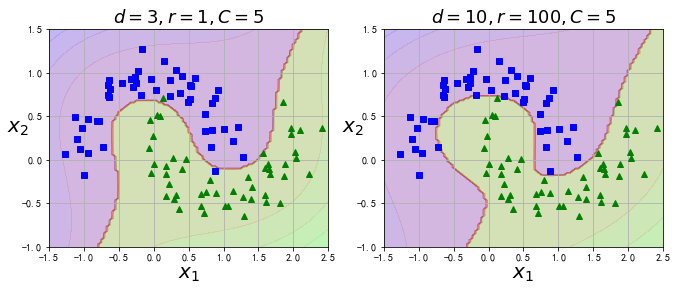

In [34]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

左边使用了3阶多项式内核训练SVM分类器，右边使用了10阶多项式核。显然，如果模型过拟合，我们应该降低多项式阶数，反过来如果拟合不足就可以尝试提升。超参数$coefo$控制的是模型受高阶多项式还是低阶多项式影响的程度。

# 添加相似特征
解决非线性问题的另一种技术是添加相似特征<br>
高斯RBF:$$\phi\gamma(x,l)=exp(-\gamma||x-l||^2)$$

这是一个从0(离地标远)到1(离地标近)变化的钟型函数

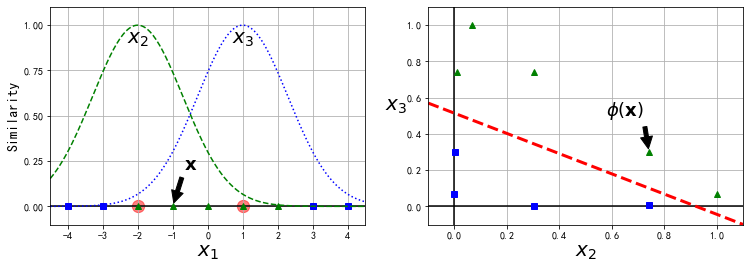

In [36]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
# 根据地标计算距离，然后用上面的公式来转化。
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# 使用一维数据转化后的数据集来做为特征
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
# 画高斯分布
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show()

你看会问该如何选择地标呢？最简单的方式是根据数据里的每一个实例的位置上创建一个地标，但这会创造许多维度，因此也增加了转换后的训练集线性可分离的机会。<br>
缺点是，一个有m个实例n个特征的训练集会被转换成m个实例m个特征的训练集(假设抛弃了原始特征)。如果训练集非常庞大，那么就会得到同样大数量的特征。

# 高斯RBF核函数
与多项式特征一样，相似特征法也可以可以运用机器学习核技巧，这样，也就不需要计算出所有附加特征，减小计算代价，同时也和添加了许多相似特征一样。

In [37]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [38]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

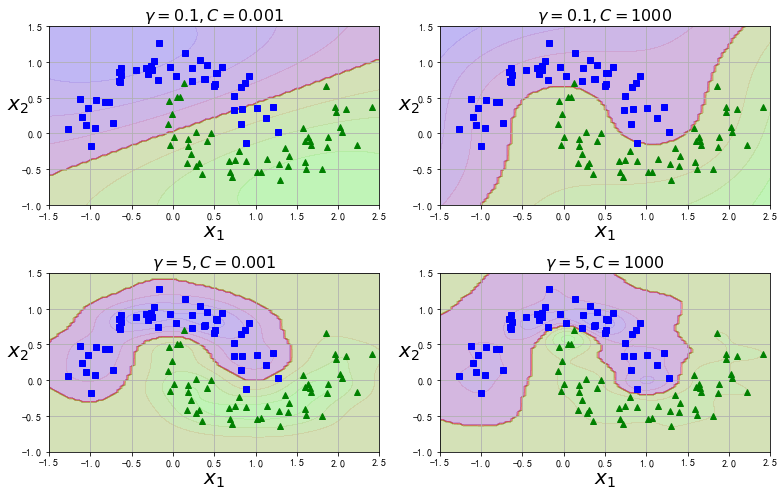

In [39]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
plt.tight_layout()
plt.show()

增加$\gamma$值会使钟型曲线变得更窄，因此每个实例的影响范围随之变小；决策边界变得更不规则，开始围绕着单个实例绕弯。反过来，减小$\gamma$值使钟形曲线变得更宽，因此每个实例的影响范围增大，决策边界变得更平坦。<br>
所以，$\gamma$就像是一个正则化的超参数:模型过度拟合，就降低它的值，如果拟合不足则提升它的值。<br><br>
有这么多的核函数，该如何决定使用哪一个呢？有一个经验法则是，永远先从线性核函数开始尝试(要记住，linearSVC比SVC(kernel="linear)快得多)，特别是训练集非常大或特征非常多的时候。<br>
如果训练集不太大，你可以试试高斯RBF核：大多数情况下它都非常好用，如果时间多，可以采用交叉验证和网格搜索来尝试一些其他的核函数。

# 计算复杂度
liblinear库为线性SVM实现了一个优化算法,LinearSVC正是基于该库的。这个算法不支持核技巧，不过它与训练实例的数量和特征数量几乎呈线性相关：其时间复杂度大致为$O(m\times n)$。
如果你想要非常高的精度，算法需要的时间更长。它由容差参数tol来控制，不过大多数分类任务中，默认的容差就够了。
SVC则是基于libsvm库的，这个库的算法支持核技巧。训练时间复杂度通常在O(m^2xn)和O(m^3xn)之间。很不幸，这意味着如果训练实例的数量变大(例如上十万个实例),它将会慢的可怕，所以这个算法完美适用于复杂但是中小型的训练集。但是，它还是可以良好得适应特征数量的增加，特别是应对稀疏特征。在这种情况下，算法复杂度大致与实例的平均非零特征数成正比例。
<br>(奇怪今天表格出不来，表格在书P144)

| 类 | 时间复杂度 | 是否支持核外 | 是否需要缩放 | 核技巧 |
| LinearSVC | O(mxn) | 否 | 是 | 否 |
| SGDClassifier | O(mxn) | 是 | 是 | 否 |
| SVC | O($m^2$xn)到O($m^3$xn) | 否 | 是 | 是 |

# SVM回归
正如前面提到，SVM算法非常全面：它不仅仅支持线性和非线性分类，而且还支持线性和非线性回归。诀窍在于，不再是尝试拟合两个类别之间可能的最宽的街道的同时限制间隔违例，SVM回归要做的是尽可能让多的实例位于街道上，同时限制不在街道上的实例。街道宽度由epsilon控制。

In [42]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [43]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [44]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

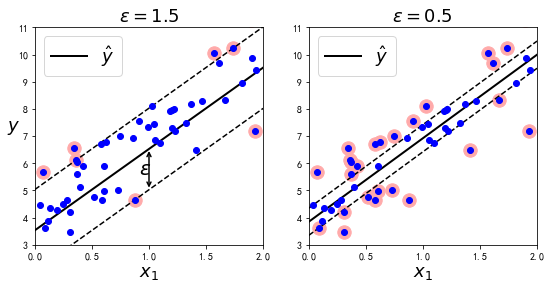

In [45]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

在间隔内添加更多的实例不会影响模型的预测，所以这个模型又被称为$epsilon$不敏感

In [46]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [47]:
from sklearn.svm import SVR
# gamma 默认为 scale 在 0.22 为了得到和书上一样的效果，设为auto
# scale适合未经过正则化的数据
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, gamma='auto', kernel='poly')

In [48]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, gamma='auto', kernel='poly')

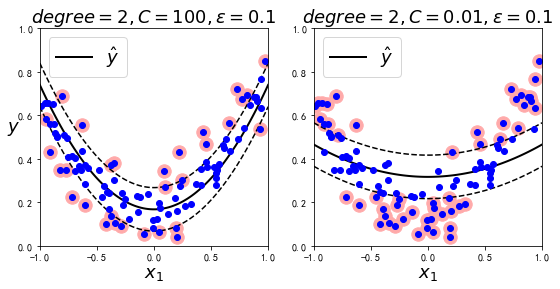

In [49]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

要解决非线性回归的任务，可以使用核化的SVM模型，左图几乎没有正则化，右图则过度正则化。SVR是SVC的回归等价类，linearSVR也是linearSVC的回归等价类。LinearSVR与训练集的大小线性相关，而SVR则在训练集变大时，变得很慢(SVC也是一样)。
<br>
SVM异常值检测 可以参考[sklearn官网](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM)-------
[官网案例](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py)

# 工作原理
本节将会介绍SVM如何进行预测，以及训练算法是如何工作的的，我们会从线性SVM开始。如果是刚刚开始接触机器学习，可以安全地跳过本节，直接进入本章末尾的练习，等到想要更深入地了解SVM时再回来也不迟。
首先，说明一下符号：偏置项表示为b，特征权重向量表示为w。同时输入特征向量中不添加偏执特征。

# 决策函数和预测
线性SVM分类器通过简单的计算决策函数线性方程来对新实例进行预测。<br>
线性SVM线性分类器预测$$
(\hat{y})=
\begin{cases}
0 &amp; if &amp; w^T\cdot x+b&lt;0,\\
1 &amp; if &amp; w^T\cdot x+b\ge0
\end{cases}
$$

In [51]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

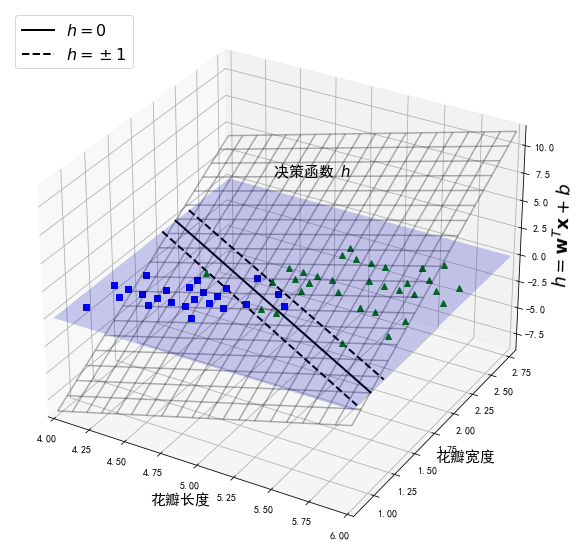

In [60]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "决策函数 $h$", fontsize=15)
    ax.set_xlabel(r"花瓣长度", fontsize=15)
    ax.set_ylabel(r"花瓣宽度", fontsize=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

plt.show()

上图显示了模型所对应的决策函数:数据集包含两个特征(花瓣宽度和长度),所以是一个二维平面。决策边界是决策函数等于0的点的集合:它是两个平面的交集，也就是一条线(加粗实现)。 当有n个特征的时候，决策函数是一个n维超平面，决策边界是一个(n-1)维的超平面。<br>
虚线表示决策函数等于1或-1的点：它们互相平行，并且与决策边界的距离相等，从而形成一个间隔。训练线性SVM分类器意味着找到w和b的值，从而使这个间隔尽可能宽的同时，避免硬间隔或是软间隔间隔违例。

# 训练目标
思考一下决策函数的斜率，它等于权重向量的范数,即||w||。如果我们将斜率除以2，那么决策函数等于+1 -1 的点也将变得离决策函数两倍远。也就是说，将斜率除以2，将会是间隔乘以2.

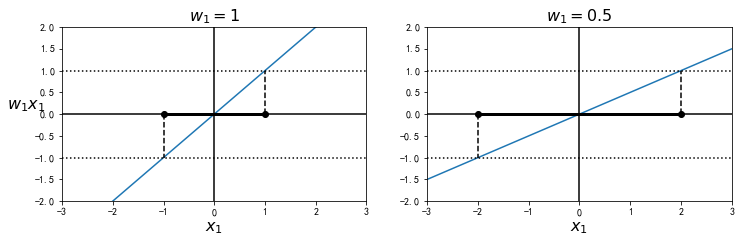

In [61]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(1, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

#### 权重越小，间隔越大👆

所以我们要最小化||w||来尽可能得到尽可能大的间隔。但是，如果我们要想避免任何间隔违例(硬间隔),那么就要使所有正类训练集的决策函数大于1，负类训练集的决策函数小于-1。
硬间隔线性SVM分类器的目标$$
\underset{w,b}{最小化}\frac{1}{2}w^T\cdot w
$$$$
使得\  t^{(i)}(w^T \cdot x^{(i)}+b) \ge1(i=1,2,...,m)
$$因此，我们可以将硬间隔线性SVM分类器的目标，看做一个约束优化问题。

要达到软间隔的目标，我们需要在此基础上引入一个松弛变量$\zeta$，松弛变量$\zeta$衡量的是第i个实例多大程度上允许间隔违例。
现在我们有了两个互相冲突的目标:是松弛变量越小越好从而减小间隔违例，同时还要使1/2*W^TW最小化以增大间隔。而这正是超参数C的用武之地：允许我们在两个目标之间权衡。
软间隔线性SVM分类器目标$$
\underset{w,b}{最小化}\frac{1}{2}w^T\cdot w + C\sum_{i=1}^{m}\zeta^{(i)}
$$$$
使得\  t^{(i)}(w^T \cdot x^{(i)}+b) \ge1-\zeta^{(i)}\ and\ \zeta^{i}\ge0(i=1,2,...,m)
$$

二次规划
硬间隔和软间隔问题都属于线性约束的凸二次优化问题，这类问题被称为二次规划(QP)问题。要解决二次规划问题又很多现成的求解器，使用到的技术各不相同，这些不在本书的讨论范围之内
二次规划问题的一般形式$$
\underset{P}{最小值}\frac{1}{2}P^T\cdot H \cdot P + f^T \cdot P
$$$$
使得\ A\cdot p \leq b 
$$$$
\begin{cases}
P是一个n_p维向量(n_p为参数数量)\\
H是一个n_p\times n_p矩阵\\
f是一个n_p维向量\\
A是一个n_c\times n_p矩阵(n_c为约束向量)\\
b是一个n_c维向量
\end{cases}
$$

# 对偶问题
针对一个给定的约束优化问题，称之为原始问题，我们常常可以用另一个不同的，但是与之密切相关的问题来表达，这个问题我们称之为对偶问题。通常来说，对偶问题的解只能算是原始问题的解的下限，但是在某些情况下，它也可能跟原始问题的解完全相同。幸运的是，SVM问题刚好满足这些条件，所以我们可以选择是解原始问题还是对偶问题，二者解相同。
线性SVM目标的对偶问题$$
\underset{\alpha}{min}\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}x^{(i)T}x^{(j)}-\sum_{i=1}^{m}\alpha^{(i)}
$$$$
s.t\ \alpha^{(i)}\ge0\ (i=1,2,...,m) 
$$

对偶问题的原始问题
$$\hat{w}=\sum_{i=1}^{m}\alpha^{(i)}t^{(i)}x^{(i)}\\$$
$$\hat{b}=\frac{1}{n_s}\sum_{i=1\\\ \hat{\alpha^{(i)}}&gt;0}^{m}(1-t^{(i)}(\hat{w}^T\cdot x^{(i)}))$$

# 核化SVM
假设我们想要将一个二阶多项式转换为一个二阶训练集(例如月亮训练集),然后在转换训练集上训练线性SVM分类器。这个二阶多项式的映射函数如下所示 (出不来，在书本P105)

注意转换后的向量是三维而不是二维的，现在我们来看看如果我们应用这个二阶多项式映射，两个二维向量a和b会发生什么变化，然后计算转换后的两个向量的点积。

核技巧：(用不来😭，公式在书本P150) 
$$ \phi(a)^T\cdot \phi(b)=$$\begin{pmatrix}
a_1^2 \\
\sqrt{2}a_1a_2\\
a_2^2
\end{pmatrix}$$^T \cdot$$\begin{pmatrix}
b_1^2 \\
\sqrt{2}b_1b_2\\
b_2^2
\end{pmatrix}$$=a_1^2b_1^2+2a_1b_1a_2b_2+a_2^2b_2^2\$$
= (a_1b_1+a_2b_2)^2$$
\begin{pmatrix} \begin{pmatrix} a_1 \\ a_2 \end{pmatrix}^T\begin{pmatrix}b_1 \\b_2\end{pmatrix}$$\end{pmatrix} =(a^T\cdot b)^2 $$

常用的核函数：$$
\begin{array}{lcl}
线性核函数:K(a,b)=a^T\cdot b\\
多项式核函数:K(a,b)=(\gamma a^T\cdot b+r)^d\\
高斯RBF核函数:K(a,b)=exp(-\gamma ||a-b||^2)\\
Sigmoid核函数:K(a,b)=tanh(\gamma^T\cdot b+ r)
\end{array}
$$


##### 正如作者说所，头痛是核技巧的副作用，所以。。。。。。我先跳过（\狗头）[资料](https://zhuanlan.zhihu.com/p/394656594)

# 在线SVM
在本章结束之前，我们快速了解一下在线SVM分类器(回想一下，在线学习意味着增量学习，通常就是新实例到来的时候学习)。
<br>
对线性SVM分类器来说，方法之一是使用梯度下降，使从原始问题导出的成本函数最小化。但不幸的是，这种方法收敛速度比二次规划要慢的多。
<br>
线性SVM分类器的损失函数：$$
J(w,b)=\frac{1}{2}w^T\cdot w+C\sum_{i=1}^{m}max(0,1-t^{(i)}(w^T\cdot x^{(i)}+b))
$$损失函数中的第一项会推动模型的到一个较小的权重向量w，从而使间隔更大。第二项则会计算全部的间隔违例。如果没有一个实例位于街道之上，并且都在街道正确的一边，那么这个实例的间隔违例为0；如不然，则该实例的违例大小与其到街道正确一边的距离成正比。
所以将这个项最小化，能够保证模型使违例尽可能小，也尽可能少。

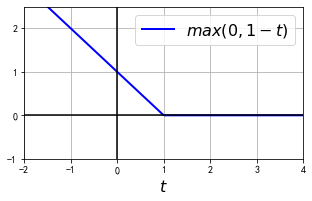

In [62]:
# Hinge损失函数
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.show()